In [24]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [25]:
# Importing Dataset
del_time=pd.read_csv('delivery_time.csv')
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [28]:
del_time=del_time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
del_time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


### Correlation

In [30]:
del_time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

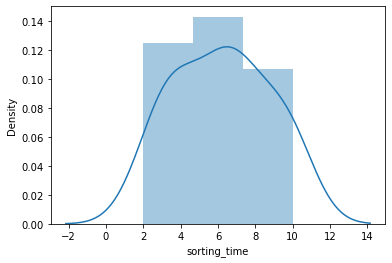

In [32]:
sns.distplot(del_time['sorting_time'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

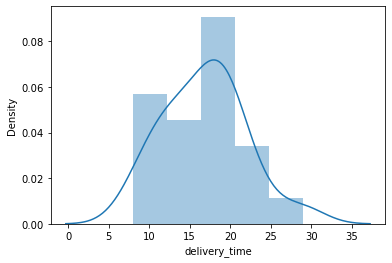

In [33]:
sns.distplot(del_time['delivery_time'])

### Building a Linear Regression Model

In [35]:
model = smf.ols("delivery_time~sorting_time",data=del_time).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

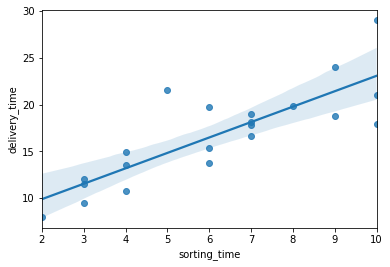

In [37]:
sns.regplot(x='sorting_time',y='delivery_time',data=del_time)

In [38]:
# Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
# t-values and p-values
print(model.tvalues, '\n' , model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [40]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict for new Data

In [42]:
test_data = pd.Series([8,2])

In [43]:
data_pred=pd.DataFrame(test_data,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,2


In [44]:
model.predict(data_pred)

0    19.774893
1     9.880774
dtype: float64